<h1>Heart Attack Risk Analysis and Prediction</h1>

This project involves analyzing an AI-generated dataset designed to mimic real-world heart attack risk factors. The dataset consists of 26 columns and 8,763 entries, containing various health-related attributes listed below:

- Patient ID --- Unique identifier for each patient
- Age --- Age of the patient
- Sex --- Gender of the patient (Male/Female)
- Cholesterol --- Cholesterol levels of the patient
- Blood Pressure --- Blood pressure of the patient (systolic/diastolic)
- Heart Rate --- Heart rate of the patient
- Diabetes --- Whether the patient has diabetes (Yes/No)
- Family History --- Family history of heart-related problems (1: Yes, 0: No)
- Smoking --- Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity --- Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption --- Level of alcohol consumption by the patient (1: Yes, 0: No)
- Exercise Hours Per Week --- Number of exercise hours per week
- Diet --- Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems --- Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use --- Medication usage by the patient (1: Yes, 0: No)
- Stress Level --- Stress level reported by the patient (1-10)
- Sedentary Hours Per Day --- Hours of sedentary activity per day
- Income --- Yearly income level of the patient (in USD)
- BMI --- Body Mass Index (BMI) of the patient
- Triglycerides --- Triglyceride levels of the patient
- Physical Activity Days Per Week --- Days of physical activity per week
- Sleep Hours Per Day --- Hours of sleep per day
- Country --- Country of the patient
- Continent --- Continent where the patient resides
- Hemisphere --- Hemisphere where the patient resides
- Heart Attack Risk --- Presence of heart attack risk (1: Yes, 0: No)

The goal of this project is to extract meaningful insights from the data through exploratory data analysis (EDA) and statistical methods. Additionally, a machine learning model will be developed to predict the probability of a person experiencing a heart attack based on their features. Various evaluation metrics will be used to assess the model’s performance, ensuring it provides accurate and reliable predictions.

<h2>Importing libraries</h2>

In [75]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

<h2>1) Importing and analyzing the dataset</h2>

We will load the dataset, and view the first 5 rows to view the imported dataset in more detail.

In [76]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Now that we have imported the dataset, we will explore the dataset so that we have a general understanding of what the dataset looks like. We will use:

- .shape to denote the number of rows and columns
- .columns to ensure that we have all the desired columns available
- .describe to get a summary for each column of the dataset

In [77]:
print('SHAPE:', df.shape)
print('\nCOLUMNS:\n  ', df.columns)
print('\nSUMMARY:\n', df.describe())

SHAPE: (8763, 26)

COLUMNS:
   Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

SUMMARY:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   


<h2>2) Data Preprocessing</h2>

We will check our dataset for any missing values. If found, we will have to drop the null columns.

In [78]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Although we do not have any null values in the dataset, we will drop null values as it is good coding practice.

In [79]:
df = df.dropna()
df.shape

(8763, 26)

To make better use of the data, we will set the 'Patient ID' column as the primary key. However, we need to make sure that it meets the requirements of being made the primary key, i.e. it should hold only unique values.

In [80]:
if(df['Patient ID'].unique().shape[0] == df.shape[0]):
    df = df.set_index('Patient ID')
    print('Patient ID set as primary key!')
else:
    print('Could not set Patient ID as primary key.')

Patient ID set as primary key!


From here onwards, for the purpose of readability, we will convert the dataset values from numeric to strings. This would provide a better information of the information we have regarding each feature.

In [81]:
# df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'}) 
# df['Diabetes'] = df['Diabetes'].replace({1: 'Yes', 0: 'No'})
# df['Family History'] = df['Family History'].replace({1: 'Yes', 0: 'No'})
# df['Smoking'] = df['Smoking'].replace({1: 'Smoker', 0: 'Non-Smoker'})
# df['Obesity'] = df['Obesity'].replace({1: 'Obese', 0: 'Not Obese'})
# df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({1: 'Consumes Alcohol', 0: 'Doesnt consume alcohol'})
# df['Previous Heart Problems'] = df['Previous Heart Problems'].replace({1: 'Yes', 0: 'No'})
# df['Medication Use'] = df['Medication Use'].replace({1: 'Yes', 0: 'No'})
# df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({1: 'At Risk', 0: 'No Risk'})

Next, we split "Blood Pressure" into two numeric columns, "Systolic" and "Diastolic"

In [82]:
bp_index = df.columns.get_loc("Blood Pressure")
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)

<h2>3) Data Visualization</h2>

Below we initialize all the features we could need for our calculations below:

In [83]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic',
       'Diastolic'],
      dtype='object')

In [84]:
numerical_features = [ 'Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
                       'Stress Level', 'Sedentary Hours Per Day', 'Income',
                       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
                       'Sleep Hours Per Day', 'Systolic', 'Diastolic']

categorical_features = [ 'Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
                         'Diet', 'Previous Heart Problems', 'Medication Use', 'Continent', 'Hemisphere' ]

clinical_factors = [ 'Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
                    'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use' ]

demographic_factors = [ 'Stress Level', 'Physical Activity Days Per Week',
                       'Sleep Hours Per Day', 'Continent', 'Hemisphere' ]

We will now investigate to see how many individuals in the dataset pose a heart attack risk as compared to ones who don't. 

In [85]:
# To be used frequently in visualization
def AddCountsToGraph(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

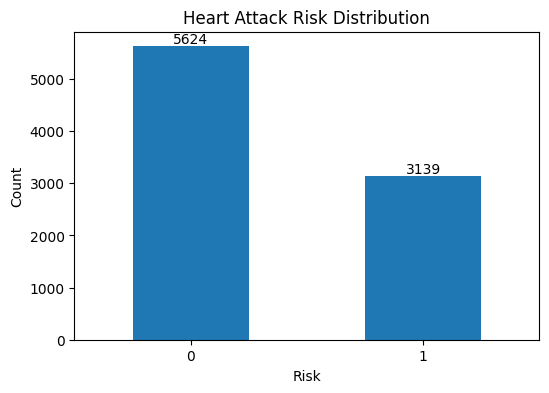

In [86]:
ax1 = df['Heart Attack Risk'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.title('Heart Attack Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.xticks(rotation=0)
AddCountsToGraph(ax1)
plt.show()

<b><h3>3.1 - Correlation of features</h3></b>

To investigate which pairs are strongly correlated to each other, we will set up a correlation matrix, and plot a correlation heatmap to visualize this relation.

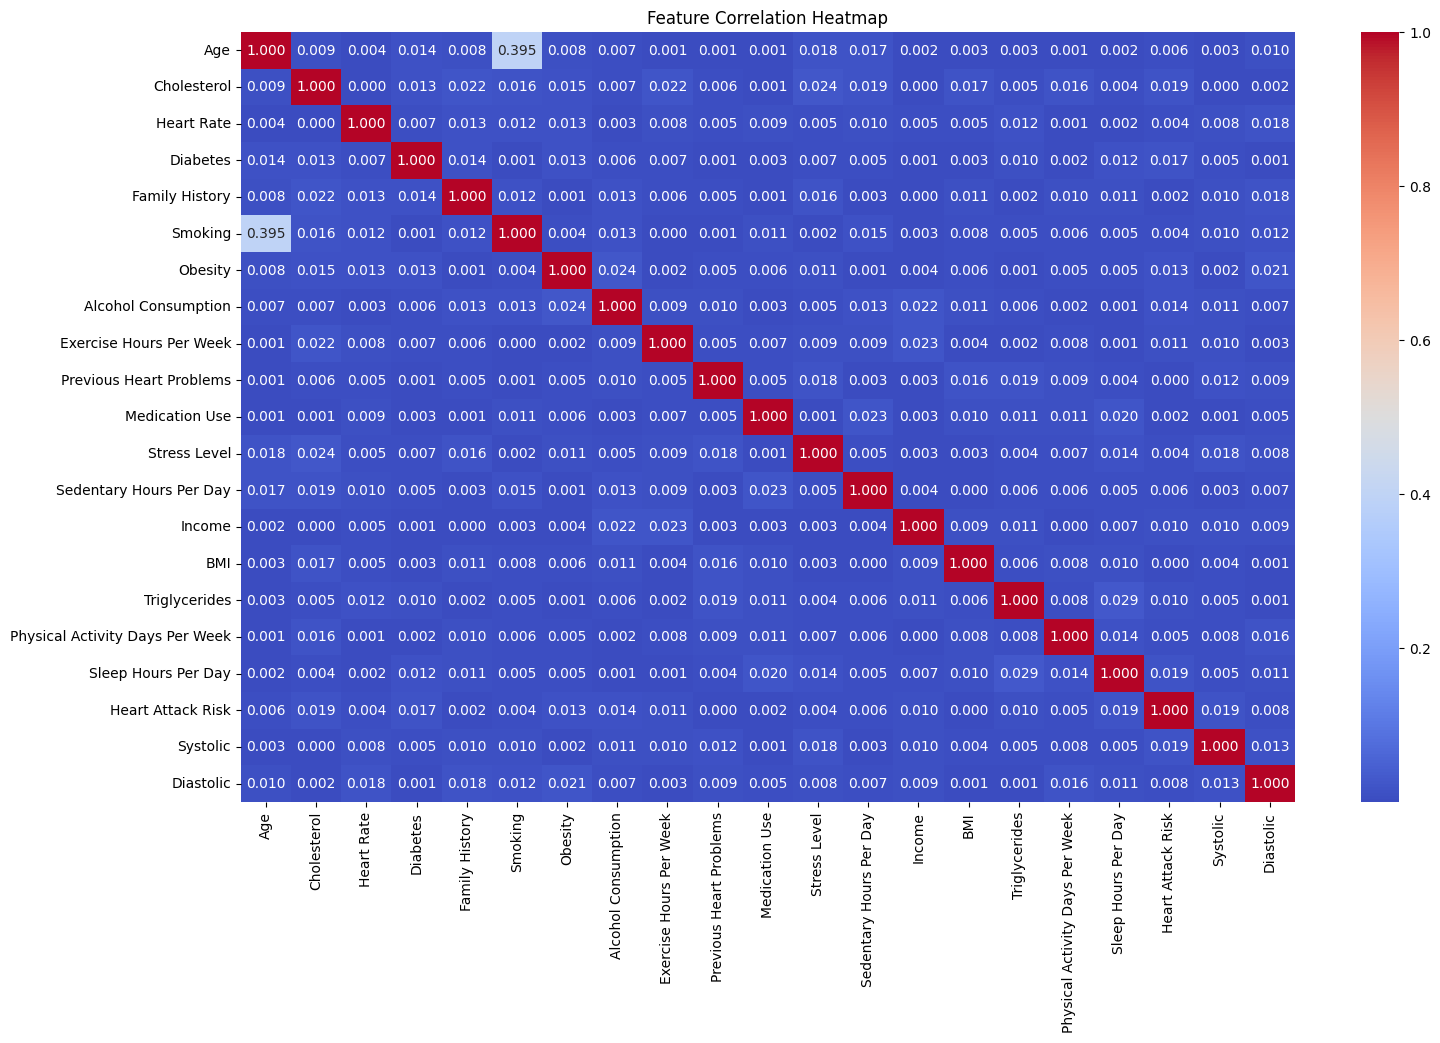

In [87]:
corr_matrix = df.corr(numeric_only=True).abs()

plt.figure(figsize=(17, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Feature Correlation Heatmap')
plt.show()

Based on the above graph, we can see clearly that only smoking is <b>highly</b> correlated to heart attack risk. However, to investigate other key features which might contribute to heart attack risk, we will only see the top 5 highly correlated features:

In [88]:
# -------------- FIX THIS CODE SUCH THAT TOP 5 HIGHLY CORRELATED FEATURES ARE SAVED (SMOKING) --------------
upper_triangle = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))

high_correlation_features = []
while len(high_correlation_features) < 5:
    heart_attack_corr = upper_triangle['Heart Attack Risk']
    
    max_corr_value = heart_attack_corr.max()        # Get the maximum correlation value
    max_corr_feature = heart_attack_corr.idxmax()   # Get the feature corresponding to the max value

    high_correlation_features.append(max_corr_feature)
    upper_triangle = upper_triangle.drop(max_corr_feature, axis=1)
    upper_triangle = upper_triangle.drop(max_corr_feature, axis=0)

print(high_correlation_features)

['Cholesterol', 'Sleep Hours Per Day', 'Diabetes', 'Alcohol Consumption', 'Obesity']


Having filtered the most significant contributors to heart attack risk, we will use those to make a pairplot to visualize their interactions with each other, and how they contribute to heart attack risk.

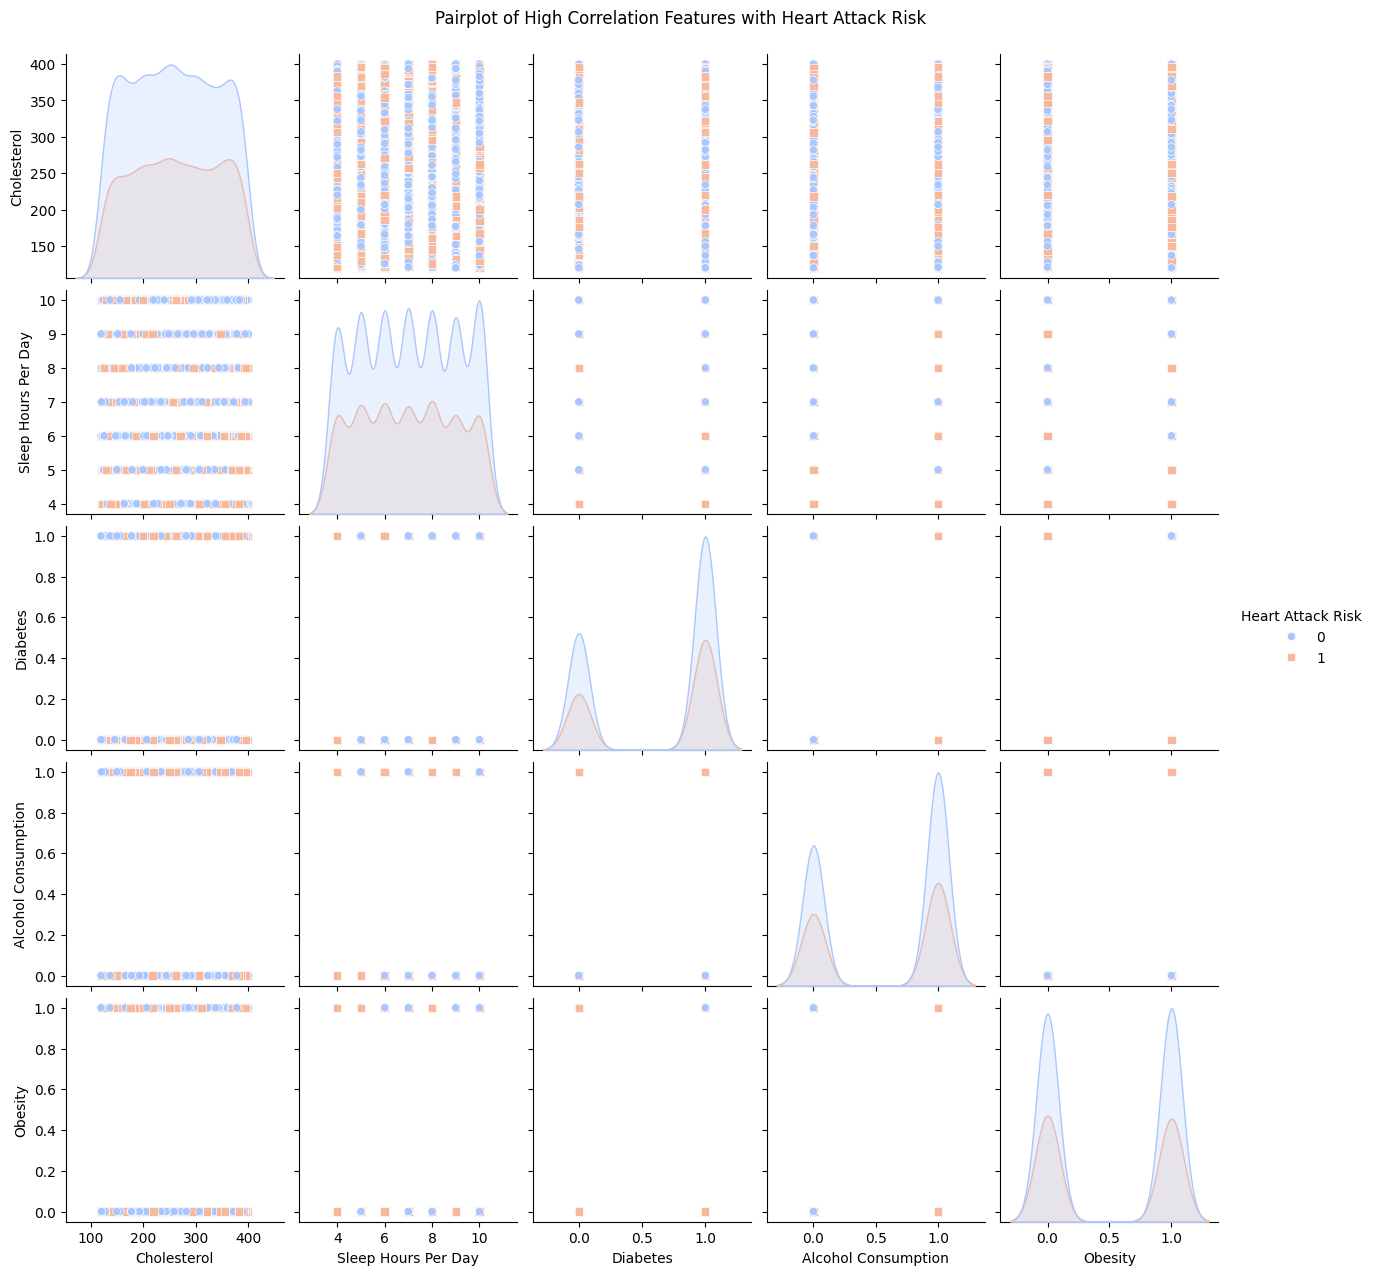

In [89]:
df_high_corr = df[high_correlation_features + ['Heart Attack Risk']]
sns.pairplot(df_high_corr, hue='Heart Attack Risk', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pairplot of High Correlation Features with Heart Attack Risk', y=1.02)
plt.show()

Based on the above results, we see most prominently that Alcohol Consumption and Diabetes, and Alcohol Consumption and Obesity are correlated with each other as well.

Other than that, as we have seen that only Smoking is correlated <b>linearly</b> with heart attack risk, therefore, we will investigate for any correlation we can get through non-linear methods.

C:\Users\Codew\AppData\Local\Temp\ipykernel_11896\2057452914.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation with Heart Attack Risk', y='Feature', data=corr_df, palette='coolwarm')


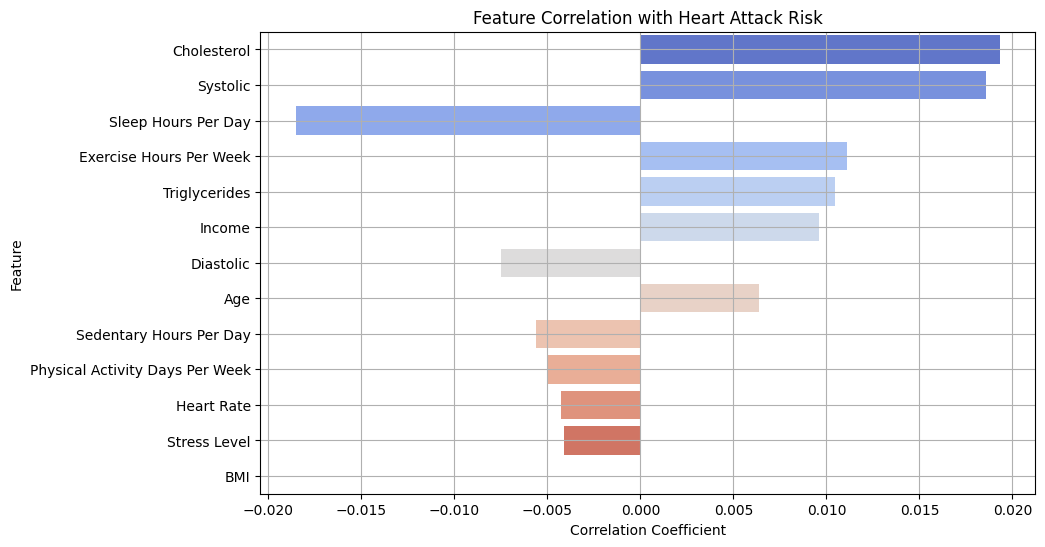

In [90]:
correlations = {}
for feature in numerical_features:
    corr = np.corrcoef(df[feature], df['Heart Attack Risk'])[0, 1]
    correlations[feature] = corr

# Convert to DataFrame
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation with Heart Attack Risk'])

# Sort by absolute value (strongest correlations first)
corr_df['Abs Correlation'] = corr_df['Correlation with Heart Attack Risk'].abs()
corr_df = corr_df.sort_values('Abs Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation with Heart Attack Risk', y='Feature', data=corr_df, palette='coolwarm')
plt.title('Feature Correlation with Heart Attack Risk')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

Seeing that there is some difference in the number of individuals having heart attack against those who do not, we will check for class imbalances in any other feature as well. Here, we will make comparisons between multiple types of features as mentioned below:

<b><h3>3.2 Numerical vs Categorical features</h3></b>
<h3>i. Numerical features<h3>

To visualize the workflow of numerical features, we will use a boxplot:

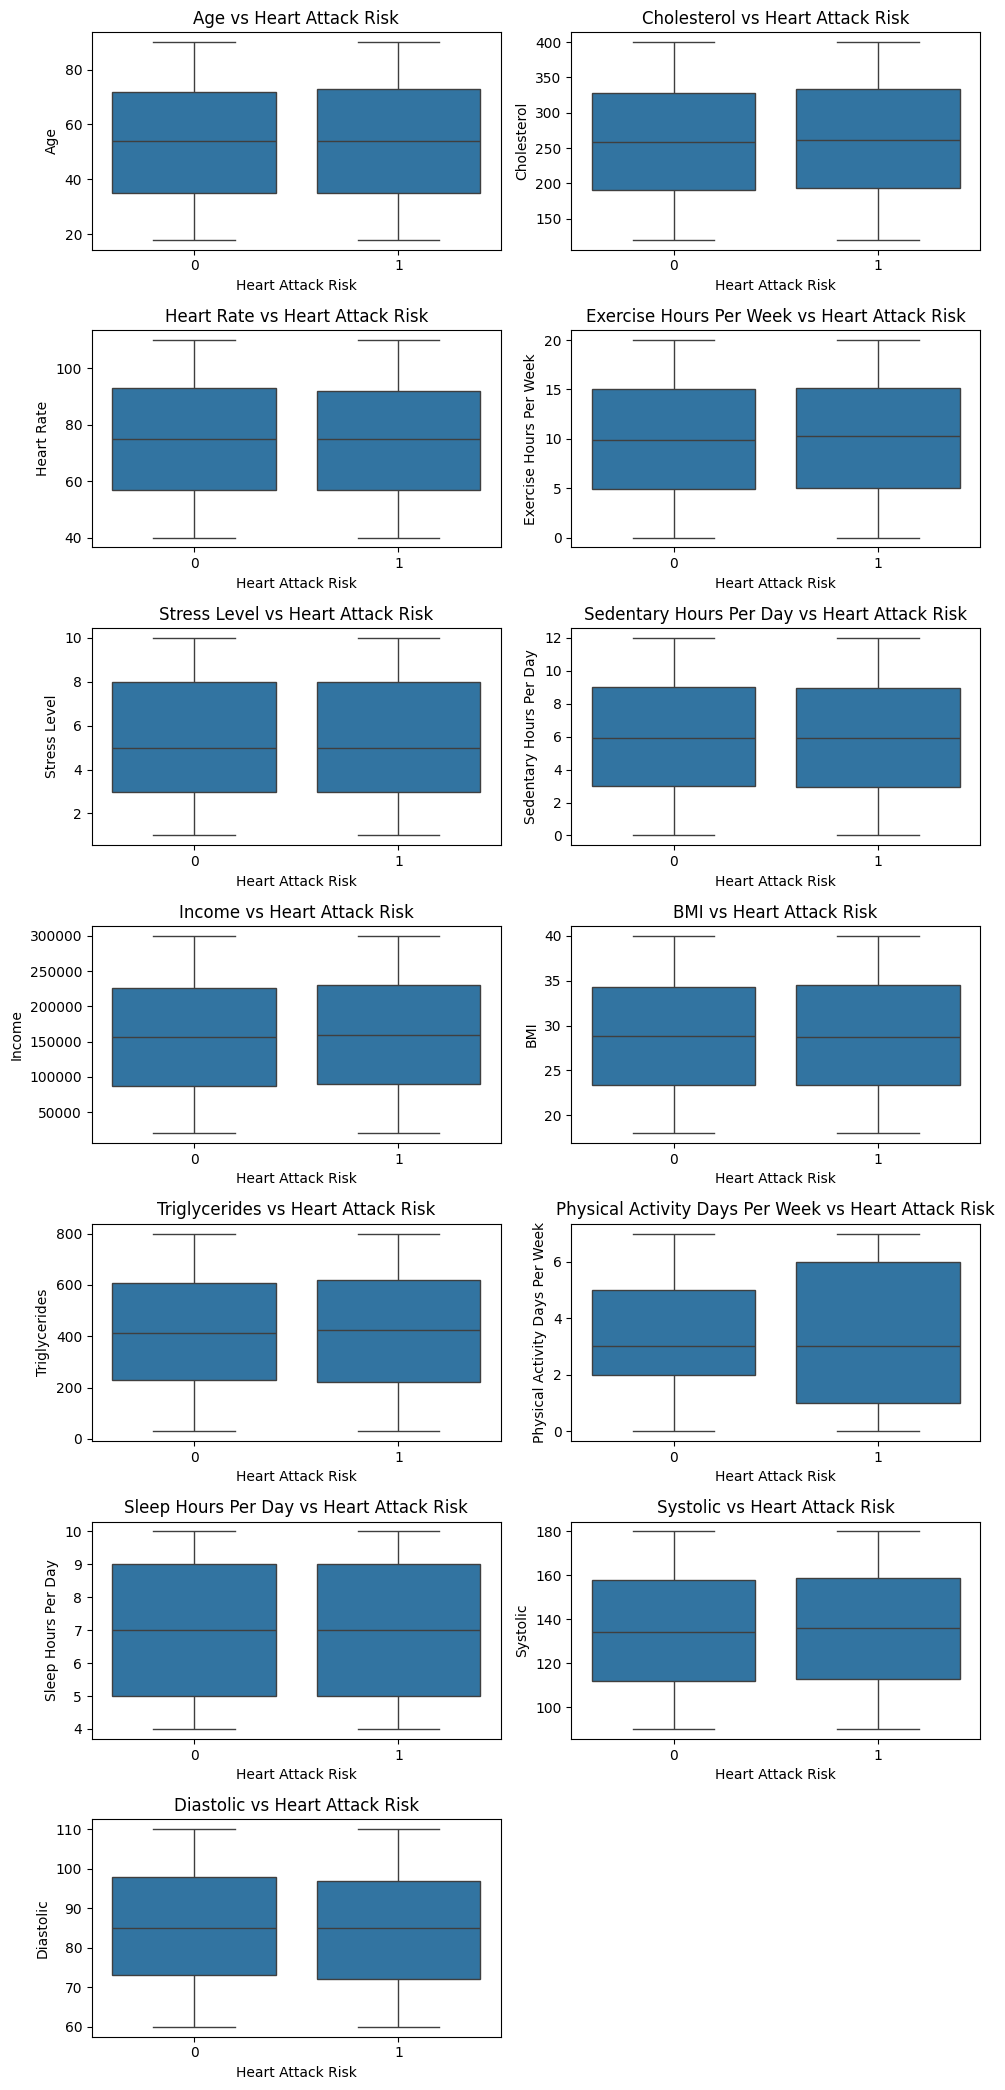

In [91]:
n_features = len(numerical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Make subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for idx, feature in enumerate(numerical_features):
    sns.boxplot(x='Heart Attack Risk', y=feature, data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Heart Attack Risk')

# If there are any empty subplots (e.g., odd number of features), turn them off
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<h3>ii. Categorical features</h3>

Similarly, we will use a countplot to investigate the correlation and class imbalances in the dataset:

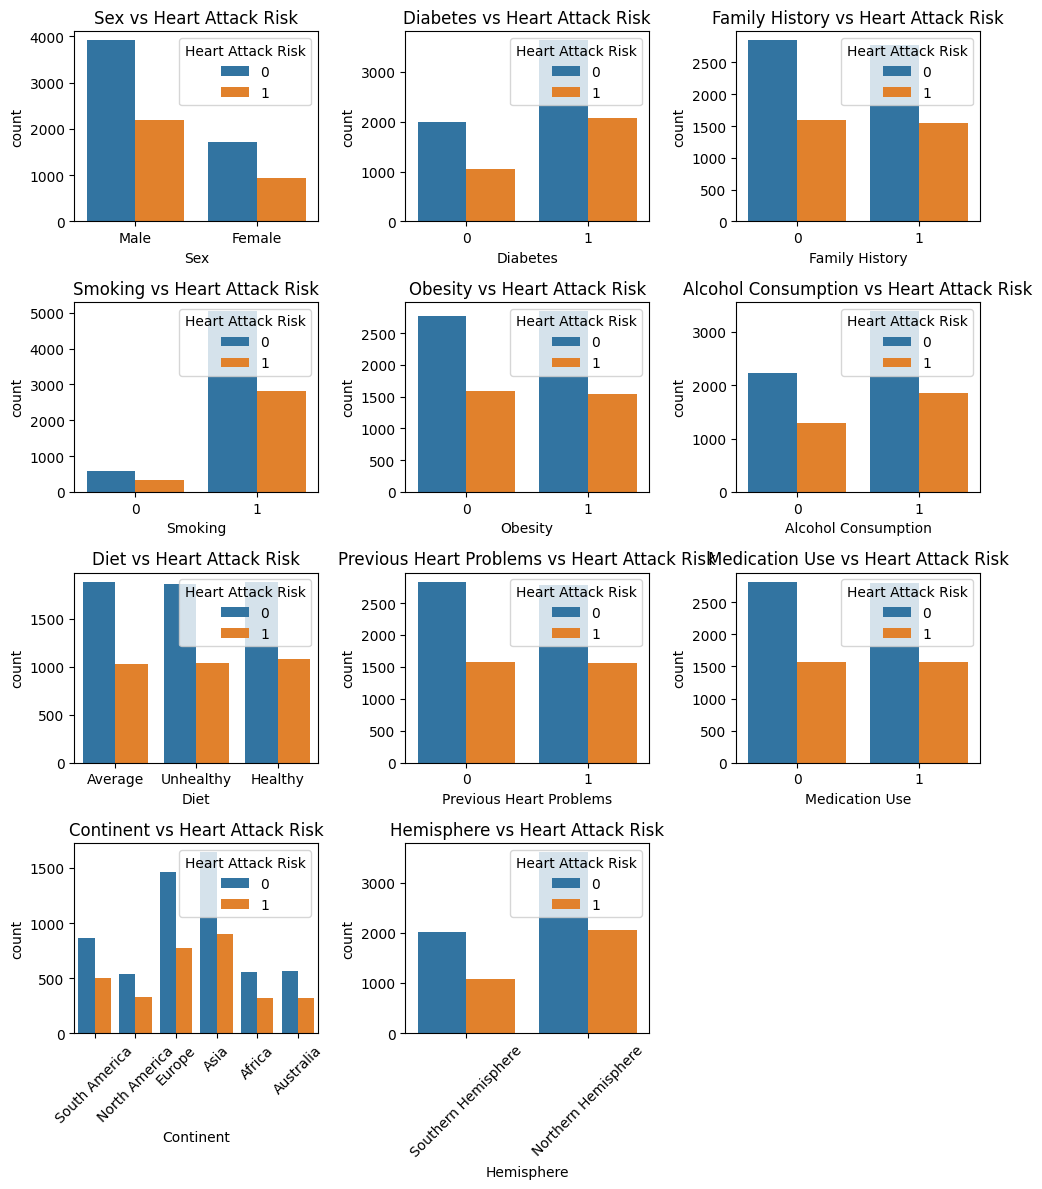

In [92]:
n_cols = 3
n_rows = (len(categorical_features) // n_cols) + (len(categorical_features) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Heart Attack Risk', data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Heart Attack Risk')

    # To set xticks for 'Continent' and 'Hemisphere' columns so that they are not overlapping
    if(feature == 'Continent' or feature == 'Hemisphere'):
        axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<b><h3>3.3 Clinical vs Demographic factors</h3></b>
<h3>i. Clinical factors</h3>

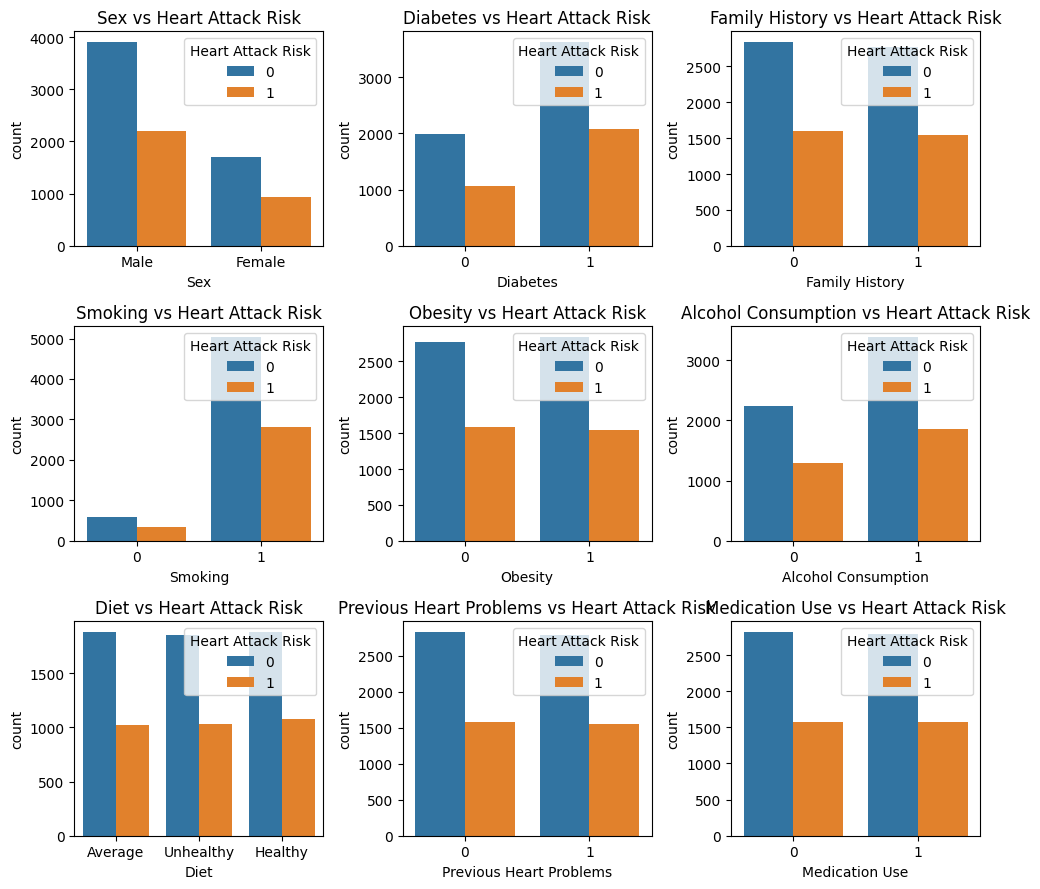

In [93]:
n_cols = 3
n_rows = (len(clinical_factors) // n_cols) + (len(clinical_factors) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(clinical_factors):
    sns.countplot(x=feature, hue='Heart Attack Risk', data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} vs Heart Attack Risk')

for idx in range(len(clinical_factors), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<h3>ii. Demographic factors</h3>

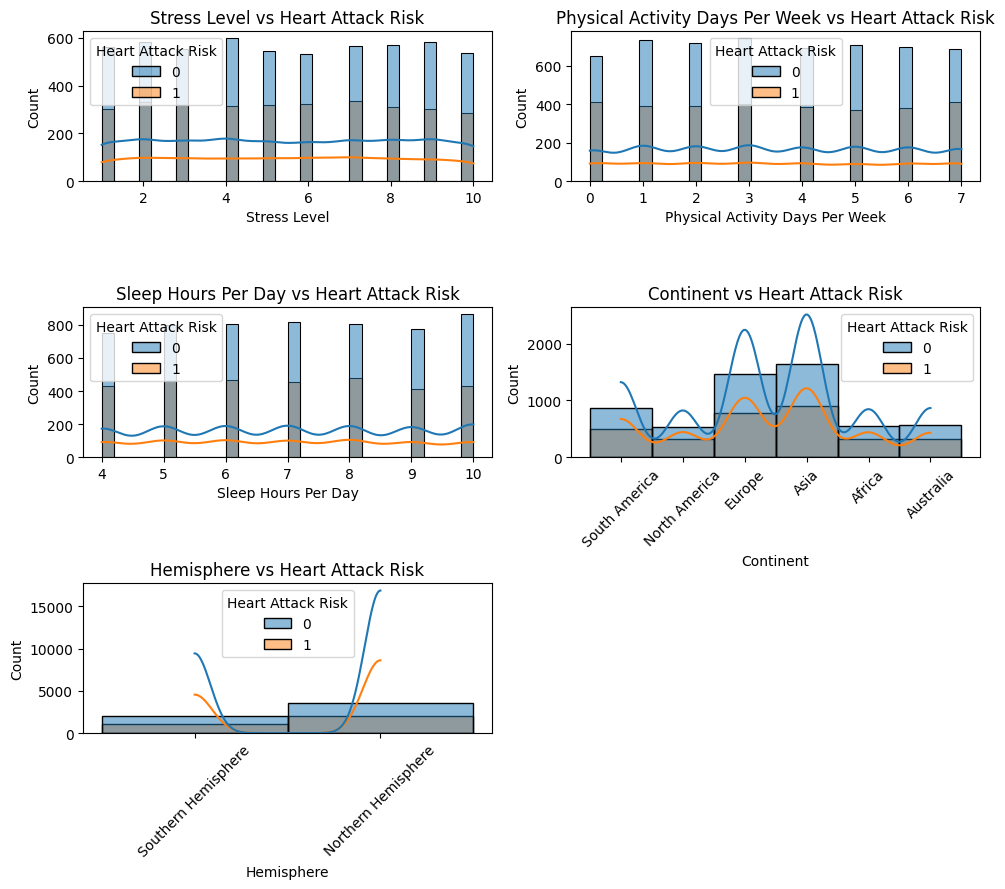

In [94]:
n_cols = 2
n_rows = (len(demographic_factors) // n_cols) + (len(demographic_factors) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(demographic_factors):
    sns.histplot(x=feature, hue='Heart Attack Risk', data=df, ax=axes[idx], kde=True, bins=30)
    axes[idx].set_title(f'{feature} vs Heart Attack Risk')
    if(feature == 'Continent' or feature == 'Hemisphere'):
        axes[idx].tick_params(axis='x', rotation=45)


for idx in range(len(demographic_factors), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [95]:
# ------------------------------------ IS THIS EVEN NECESSARY??? ------------------------------------
# Reconverting strings back to floats
# df['Sex'] = df['Sex'].replace({'Male': 1, 'Female': 0}) 
# df['Diabetes'] = df['Diabetes'].replace({'Yes': 1, 'No': 0})
# df['Family History'] = df['Family History'].replace({'Yes': 1, 'No': 0})
# df['Smoking'] = df['Smoking'].replace({'Smoker': 1, 'Non-Smoker': 0})
# df['Obesity'] = df['Obesity'].replace({'Obese': 1, 'Not Obese': 0})
# df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({'Consumes Alcohol': 1, 'Doesnt consume alcohol': 0})
# df['Previous Heart Problems'] = df['Previous Heart Problems'].replace({'Yes': 1, 'No': 0})
# df['Medication Use'] = df['Medication Use'].replace({'Yes': 1, 'No': 0})
# df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({'At Risk': 1, 'No Risk': 0})

<h2>4) Model Prediction</h2>
<h3>4.1 - Making Scaler Class</h3>

In [96]:
class ScalerClass:
    def __init__(self):
        self.mean = {}
        self.sd = {}
    
    def fit(self, data):
        data = data.to_numpy(dtype=float)
        for i in range(data.shape[1]):
            self.mean[i] = np.mean(data[:, i])
            self.sd[i] = np.std(data[:, i])
    
    def transform(self, data):
        data = data.to_numpy()
        standardized_data = data
        for i in range(data.shape[1]):
            standardized_data[:, i] = (data[:, i] - self.mean[i]) / self.sd[i]
        
        return standardized_data

<h3>4.2 - Making a Linear Regression Model</h3>

In [97]:
class LinearRegressionClass:
    def __init__(self, lr, size):
        self.theta_0 = 0
        self.theta_1 = 0
        self.learning_rate = lr
        self.no_of_iterations = size
        self.scalerizer = ScalerClass()

    def fit(self, train_data, train_label):
        self.scalerizer.fit(train_data)
        final_data = self.scalerizer.transform(train_data)  # Standardized data

        loss_values = []
        m, n = final_data.shape
        self.theta_1 = np.zeros(n)

        for _ in range(self.no_of_iterations):
            predictions = self.theta_0 + np.dot(final_data, self.theta_1)       # Calculating dot product
            error = predictions - train_label

            temp0 = np.sum(error) / m
            temp1 = np.dot(final_data.T, error) / m
            self.theta_0 = self.theta_0 - (self.learning_rate * temp0)
            self.theta_1 = self.theta_1 - (self.learning_rate * temp1)

            loss_i = np.mean(error ** 2) / 2
            loss_values.append(loss_i)

        return loss_values


    def score(self, test_data, test_labels):
        test_data_stdized = self.scalerizer.transform(test_data)
        predictions = self.theta_0 + np.dot(test_data_stdized, self.theta_1)
        m = len(test_data_stdized)
        MSE = np.sum((predictions - test_labels) ** 2) / (2 * m)
        return MSE


    def predict(self, test_data):
        test_data_stdized = self.scalerizer.transform(test_data)
        predicted_labels = self.theta_0 + np.dot(test_data_stdized, self.theta_1)
        return predicted_labels.tolist()

<h3>4.3 - Separating training and testing data</h3>

In [98]:
y = df['Heart Attack Risk']
X = df.drop('Heart Attack Risk', axis=1)

# Setting up a required variables
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
train_X_numeric = train_X.select_dtypes(include=[np.number])
test_X_numeric = test_X.select_dtypes(include=[np.number])

<h3>4.4 - Applying SMOTE for class imbalances</h3>

In [99]:
# Apply SMOTE to the training set to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(train_X_numeric, train_y)
X_test_smote, y_test_smote = smote.fit_resample(test_X_numeric, test_y)

<h3>4.5 - Training and testing on dataset</h3>

Mean Square Error for training set: 0.11585297755186638
Mean Square Error for test set:     0.1170839924403744


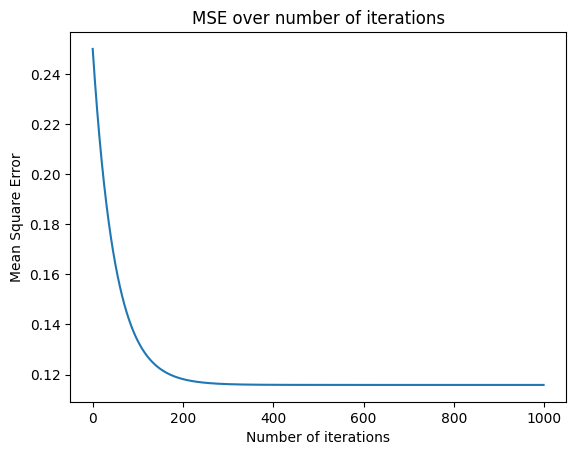

In [100]:
# Training
linear_regression = LinearRegressionClass(0.01, 1000)
loss_values = linear_regression.fit(X_train_smote, y_train_smote)
predictions = linear_regression.predict(X_test_smote)

# Scoring
MSN_train = linear_regression.score(X_train_smote, y_train_smote)
MSN_test = linear_regression.score(X_test_smote, y_test_smote)

print('Mean Square Error for training set:', MSN_train)
print('Mean Square Error for test set:    ', MSN_test)

# Plotting
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel("Number of iterations")
plt.ylabel("Mean Square Error")
plt.title("MSE over number of iterations")
plt.show()

In [101]:
# Convert list to NumPy array
y_pred_continuous = np.array(linear_regression.predict(X_test_smote))

best_threshold = 0
best_accuracy = 0

thresholds = [i / 100 for i in range(0, 101)]  # Thresholds from 0.00 to 1.00

for t in thresholds:
    y_pred_binary = (y_pred_continuous >= t).astype(int)
    acc = accuracy_score(y_test_smote, y_pred_binary)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")

y_pred_binary = (y_pred_continuous >= best_threshold).astype(int)

Best Threshold: 0.57
Best Accuracy: 0.6141342756183745


<h3>4.6 - Evaluating model</h3>

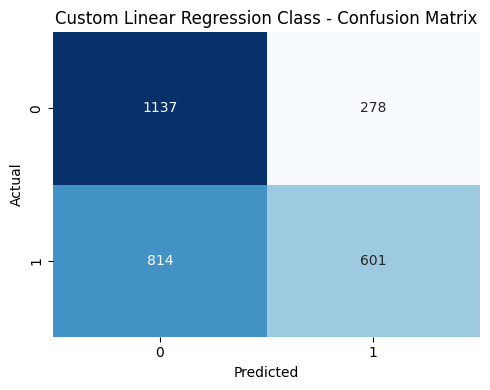

Custom Linear Regression Class - Evaluation Metrics
Precision: 0.6837315130830489
Recall: 0.42473498233215545
F1 Score: 0.5239755884917175

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.80      0.68      1415
           1       0.68      0.42      0.52      1415

    accuracy                           0.61      2830
   macro avg       0.63      0.61      0.60      2830
weighted avg       0.63      0.61      0.60      2830



In [102]:
def evaluate_model(y_test, y_pred, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print(f"{model_name} - Evaluation Metrics")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


evaluate_model(y_test_smote, y_pred_binary, "Custom Linear Regression Class")

# Evaluate Sklearn Logistic Regression
# evaluate_model(train_y, testing.predict(train_X_numeric), "Sklearn Logistic Regression")

# Evaluate Sklearn Neural Network
# evaluate_model(y_test, y_pred_nn, "Sklearn Neural Network")


<h3>4.7 - Comparison with Scikit-learn's findings</h3>

c:\Users\Codew\anaconda3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


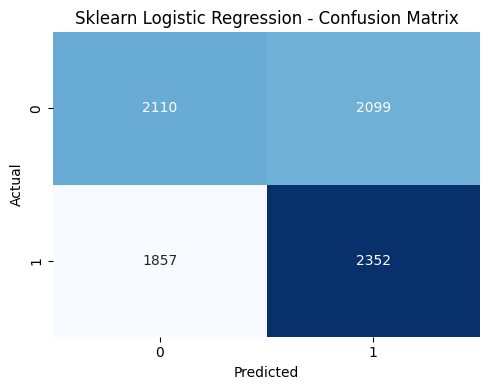

Sklearn Logistic Regression - Evaluation Metrics
Precision: 0.5284205796450235
Recall: 0.5588025659301497
F1 Score: 0.5431870669745958

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.52      4209
           1       0.53      0.56      0.54      4209

    accuracy                           0.53      8418
   macro avg       0.53      0.53      0.53      8418
weighted avg       0.53      0.53      0.53      8418

Best Threshold: 0.01
Best Accuracy: 0.5300546448087432


In [103]:
logistic_sklearn = LogisticRegression(class_weight='balanced')  # Automatically adjusts weights
logistic_sklearn.fit(X_train_smote, y_train_smote)

# Convert list to NumPy array
y_pred_continuous = np.array(logistic_sklearn.predict(X_train_smote))

best_threshold = 0
best_accuracy = 0
thresholds = [i / 100 for i in range(0, 101)]  # Thresholds from 0.00 to 1.00

for t in thresholds:
    y_pred_binary = (y_pred_continuous >= t).astype(int)
    acc = accuracy_score(y_train_smote, y_pred_binary)
    if acc > best_accuracy:
        best_accuracy = acc
        best_threshold = t


y_pred_binary = (y_pred_continuous >= best_threshold).astype(int)

# Evaluate
evaluate_model(y_train_smote, y_pred_binary, "Sklearn Logistic Regression")
print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")


# Evaluate Sklearn Logistic Regression
# evaluate_model(train_y, testing.predict(train_X_numeric), "Sklearn Logistic Regression")

# Evaluate Sklearn Neural Network
# evaluate_model(y_test, y_pred_nn, "Sklearn Neural Network")

<h2>Conclusion</h2>

SUMMARIZE:
- All the findings of the dataset we had 
- The general gist of the model
- The explanation of our findings
- Answer the rest of the questions 